In [83]:
#importing the library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
df = pd.read_csv('airquality.csv')
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26
149,150,NaN,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


In [85]:
#dropping the unnamed column
df= df.drop(labels = ['Unnamed: 0'],axis=1)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [86]:
#calculating the null values
df.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [87]:
column_means= df.mean()
df = df.fillna(column_means)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26
149,42.12931,145.000000,13.2,77,9,27
150,14.00000,191.000000,14.3,75,9,28
151,18.00000,131.000000,8.0,76,9,29


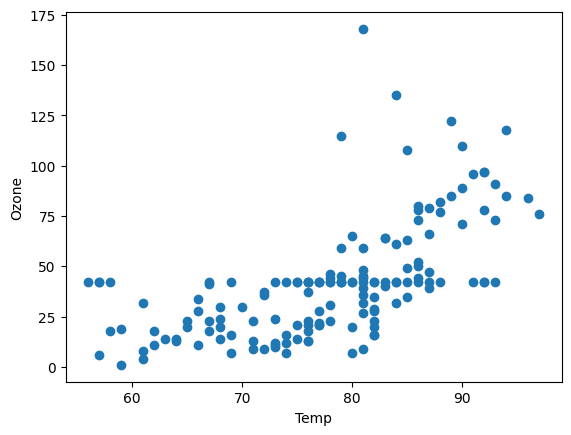

In [88]:
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.scatter(df['Temp'],df['Ozone'])

In [89]:
# Model 1
# data set for two variables.
df2 = df[['Ozone','Temp']]
df2

,Ozone,Temp
0,41.00000,67
1,36.00000,72
2,12.00000,74
3,18.00000,62
4,42.12931,56
...,...,...
148,30.00000,70
149,42.12931,77
150,14.00000,75
151,18.00000,76


In [90]:
df2.corr()

,Ozone,Temp
Ozone,1.000000,0.608742
Temp,0.608742,1.000000


In [91]:
#splitting the dataset into 75 and 20 perent
from sklearn.model_selection import train_test_split
x = df2['Temp']
Y = df2['Ozone']
X = x.array.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [92]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [93]:
regressor = regressor.fit(X_train,Y_train)
regressor

LinearRegression()

In [94]:
Y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results)

        Actual  Predicted
37    29.00000  50.568770
145   36.00000  48.746363
41    42.12931  70.615251
68    97.00000  68.792844
122   85.00000  72.437659
137   13.00000  30.522290
135   28.00000  41.456734
23    32.00000  12.298216
99    89.00000  65.148029
103   44.00000  57.858400
130   23.00000  43.279141
115   45.00000  45.101548
121   84.00000  76.082473
31    42.12931  43.279141
0     41.00000  23.232660
64    42.12931  54.213585
101   42.12931  68.792844
75     7.00000  46.923956
16    34.00000  21.410253
116  168.00000  48.746363
77    35.00000  50.568770
60    42.12931  52.391178
42    42.12931  68.792844
106   42.12931  45.101548
49    12.00000  34.167104
93     9.00000  48.746363
13    14.00000  25.055068
17     6.00000   5.008587
94    16.00000  50.568770
1     36.00000  32.344697
39    71.00000  65.148029
144   23.00000  30.522290
150   14.00000  37.811919
148   30.00000  28.699882
120  118.00000  72.437659
113    9.00000  32.344697
22     4.00000  12.298216
28    45.000

In [95]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.3266134652335819

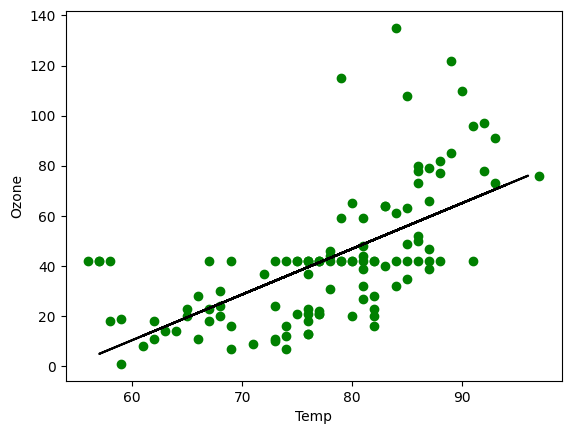

In [96]:
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.scatter(X_train, Y_train,color='g') 
plt.plot(X_test, Y_pred,color='k') 
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [98]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 19.01
Mean squared error: 756.61
Root mean squared error: 27.51


In [99]:
# Model 2
# Correlation between all features
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000


In [100]:
from sklearn.model_selection import train_test_split
X1 = df.drop(columns = 'Ozone').values
Y1 = df['Ozone'].values
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.75)

In [101]:
print(X1)

[[190.           7.4         67.           5.           1.        ]
 [118.           8.          72.           5.           2.        ]
 [149.          12.6         74.           5.           3.        ]
 [313.          11.5         62.           5.           4.        ]
 [185.93150685  14.3         56.           5.           5.        ]
 [185.93150685  14.9         66.           5.           6.        ]
 [299.           8.6         65.           5.           7.        ]
 [ 99.          13.8         59.           5.           8.        ]
 [ 19.          20.1         61.           5.           9.        ]
 [194.           8.6         69.           5.          10.        ]
 [185.93150685   6.9         74.           5.          11.        ]
 [256.           9.7         69.           5.          12.        ]
 [290.           9.2         66.           5.          13.        ]
 [274.          10.9         68.           5.          14.        ]
 [ 65.          13.2         58.           5.   

In [102]:
print(Y1)

[ 41.          36.          12.          18.          42.12931034
  28.          23.          19.           8.          42.12931034
   7.          16.          11.          14.          18.
  14.          34.           6.          30.          11.
   1.          11.           4.          32.          42.12931034
  42.12931034  42.12931034  23.          45.         115.
  37.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  29.          42.12931034  71.
  39.          42.12931034  42.12931034  23.          42.12931034
  42.12931034  21.          37.          20.          12.
  13.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034 135.          49.          32.          42.12931034
  64.          40.          77.          97.          97.
  85.          42.12931034  10.          27.          42.12931034
   7.          48.          35.          61.          79.


In [103]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train,Y1_train)

LinearRegression()

In [104]:
Y1_pred = regressor1.predict(X1_test)
results = pd.DataFrame({'Actual': Y1_test, 'Predicted': Y1_pred})
print(results)


        Actual  Predicted
0     42.12931  52.235006
1     91.00000  67.732838
2     42.12931  61.680567
3     42.12931  34.555904
4     14.00000  44.143845
..         ...        ...
110  118.00000  66.189771
111   42.12931  13.439943
112   42.12931  49.717369
113    7.00000  52.265827
114   13.00000  26.079276

[115 rows x 2 columns]


In [105]:
r2_score(Y1_test,Y1_pred)

0.3815797431103587

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y1_test, Y1_pred)
mse = mean_squared_error(Y1_test, Y1_pred)
rmse = np.sqrt(mse)

In [107]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 17.71
Mean squared error: 527.82
Root mean squared error: 22.97


In [108]:
regressor1.score(X1_train,Y1_train)

0.4079207012555187

In [109]:
#New dataframe
df_new =df[['Ozone','Solar.R','Wind','Temp']]
df_new.head()

,Ozone,Solar.R,Wind,Temp
0,41.00000,190.000000,7.4,67
1,36.00000,118.000000,8.0,72
2,12.00000,149.000000,12.6,74
3,18.00000,313.000000,11.5,62
4,42.12931,185.931507,14.3,56


In [110]:
from sklearn.model_selection import train_test_split
X2 = df_new.drop(columns = 'Ozone')
Y2 = df_new['Ozone']
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.75)


In [111]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X2_train,Y2_train)

LinearRegression()

In [112]:
reg.score(X2_train,Y2_train)

0.5582358933693639

In [113]:
print(reg.intercept_)

-93.11743667777014


In [114]:
print(reg.coef_)

[ 0.03530763 -0.62420077  1.72068999]


In [115]:
print(reg.predict([[229.000000 , 10.3   , 90]]))

[63.40084154]


C:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [116]:
Y2_pred = reg.predict(X2_test)
results = pd.DataFrame({'Actual': Y2_test, 'Predicted': Y2_pred})
print(results)


        Actual  Predicted
142   16.00000  50.082370
98   122.00000  66.530615
88    82.00000  61.204722
66    40.00000  53.982639
137   13.00000  25.827698
..         ...        ...
67    77.00000  64.864764
139   18.00000  21.463731
65    64.00000  53.007344
42    42.12931  68.270303
36    42.12931  43.212216

[115 rows x 2 columns]


In [117]:
r2_score(Y2_test,Y2_pred)

0.39433768379241485

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y2_test, Y2_pred)
mse = mean_squared_error(Y2_test, Y2_pred)
rmse = np.sqrt(mse)

In [119]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 16.62
Mean squared error: 542.41
Root mean squared error: 23.29
